In [4]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=ehyrPuoIgQksnEJFWOjTauL3OlKoz6&prompt=consent&access_type=offline&code_challenge=fLL9sEfhFfT4W5IMKnF5lBpruzHVB1CcADRGciCtbHI&code_challenge_method=S256

Enter verification code: 4/1AX4XfWhh9xRsD0jj4tcV-jF7gXbRIguQd7nctTI2Kp048Swt_O94LKmGgcQ
Authenticated


In [6]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [7]:
# 1 What is the average number of transactions per purchaser?
%%bigquery --project vigilant-result-285814 
SELECT AVG(totals.transactions)
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`

,f0_
0,1.048736


In [8]:
# 2 Calculate the average number of transactions per purchaser for April 2017
%%bigquery --project vigilant-result-285814
SELECT AVG(totals.transactions)
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
_TABLE_SUFFIX BETWEEN '20170401' AND '20170431'

,f0_
0,1.033405


In [9]:
# 3 What is the total number of transactions generated per device browser?
%%bigquery --project vigilant-result-285814
SELECT device.browser, 
SUM(totals.transactions) as total_transactions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` 
GROUP BY device.browser

,browser,total_transactions
0,NokiaE52-1,NaN
1,Nokia Browser,NaN
2,Hisense M20-M_LTE,NaN
3,Coc Coc,NaN
4,HTC802t_TD,NaN
5,no-ua,NaN
6,UC Browser,NaN
7,SeaMonkey,NaN
8,Edge,59.0
9,Seznam,NaN


In [10]:
# 4 Identify the top 5 browsers used for making transactions in July 2017, listed in descending order by total transactions. 
%%bigquery --project vigilant-result-285814 df
SELECT browser, total_transactions from 
  (SELECT device.browser as browser, SUM(totals.transactions) as total_transactions 
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` 
    GROUP BY device.browser) 
ORDER BY total_transactions DESC 
LIMIT 5

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,browser,total_transactions
0,Chrome,10924
1,Safari,787
2,Firefox,207
3,Internet Explorer,113
4,Edge,59


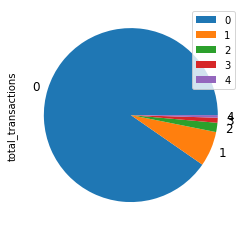

In [78]:
import matplotlib.pyplot as plt
df.plot(x="browser", y="total_transactions", kind="pie", rot=10, fontsize=12)

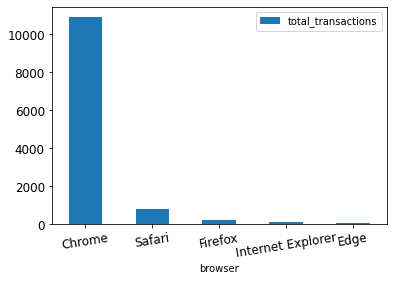

In [13]:
import matplotlib.pyplot as plt
df.plot(x="browser", y="total_transactions", kind="bar", rot=9, fontsize=12)

In [16]:
# 5 How much time did all users spend on the site?
%%bigquery --project vigilant-result-285814
SELECT SUM(totals.timeOnSite)
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`

,f0_
0,118672851


In [17]:
# 6 Average time spent on the site
%%bigquery --project vigilant-result-285814
SELECT AVG(totals.timeOnSite)
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`

,f0_
0,262.612141


In [38]:
# 7
%%bigquery --project vigilant-result-285814 df1
SELECT geoNetwork.continent,
SUM(totals.timeOnSite) as timeOnSite
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY geoNetwork.continent

In [39]:
type(df1)

pandas.core.frame.DataFrame

In [46]:
df1

,continent,timeOnSite
0,Africa,1107835
1,Asia,18307489
2,Americas,80353134
3,Oceania,1637780
4,Europe,17126046
5,(not set),140567


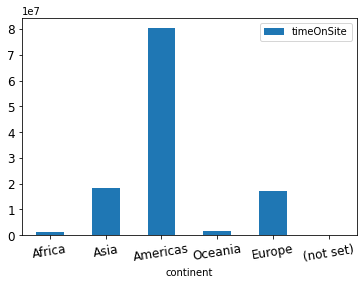

In [79]:
import matplotlib.pyplot as plt
df1.plot(x="continent", y="timeOnSite", kind="bar", rot=9, fontsize=12)

In [35]:
# 8
%%bigquery --project vigilant-result-285814
SELECT geo, total_transactions from 
  (SELECT geoNetwork.country as geo, SUM(totals.transactions) as total_transactions 
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` 
    GROUP BY geoNetwork.country) 
ORDER BY total_transactions DESC 
LIMIT 11

,geo,total_transactions
0,United States,11440
1,Canada,199
2,Venezuela,153
3,Mexico,20
4,Taiwan,19
5,United Kingdom,19
6,Japan,18
7,Indonesia,18
8,Australia,13
9,Puerto Rico,11
